In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
#import category_encoders as ce

from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler  

df=pd.read_csv('MRec.csv')
df.head(7)

,Age,Gender,Mood,Genre,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,18,F,Happy,Rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,F,Gloomy,Instrumental,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,F,Stressed,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,F,Relaxing,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,F,Energetic,Hiphop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,19,M,Happy,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,19,M,Gloomy,EDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#Replacing categorical data with integer values
df['Gender'].replace(['M','F'],[0,1], inplace=True)
df['Mood'].replace(['Happy','Gloomy','Stressed','Relaxing','Energetic'],[1,2,3,4,5], inplace=True)
df.head(7)


,Age,Gender,Mood,Genre,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,18,1,1,Rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,1,2,Instrumental,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,1,3,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,1,4,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,1,5,Hiphop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,19,0,1,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,19,0,2,EDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
indp= df.iloc[:,:-1].values 
dpn= df.iloc[:,3].values

#handling missing data (Replacing missing data with the mean value)  
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#Fitting imputer object to the independent variables.   
imputerimputer= imputer.fit(indp[:, 1:3])  

#Replacing missing data with the calculated mean value  
indp[:, 1:3]= imputer.transform(indp[:, 1:3]) 

df.head(7)

,Age,Gender,Mood,Genre,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,18,1,1,Rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,1,2,Instrumental,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,1,3,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,1,4,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,1,5,Hiphop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,19,0,1,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,19,0,2,EDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Model testing
X=df[['Age','Gender','Mood']]
y=df['Genre']
X_train,X_test,y_train,y_test=train_test_split(X.values,y,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions=model.predict([ [21,0,4],[21,1,1],[24,0,1],[31,0,4],[22,0,5] ])
predictions

array(['Indie/Acoustic', 'Indie/Acoustic', 'Indie/Acoustic', 'Rock',
       'Rock'], dtype=object)

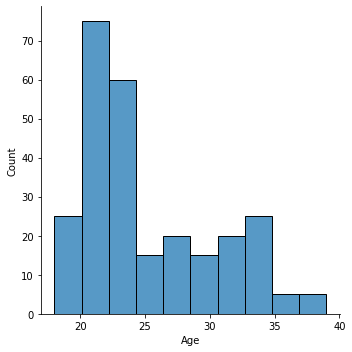

In [48]:
#Data visualization
sns_plot = sns.displot(df['Age'])

plt.show()


Text(0.5, 1.0, 'Count of demographics in dataset:')

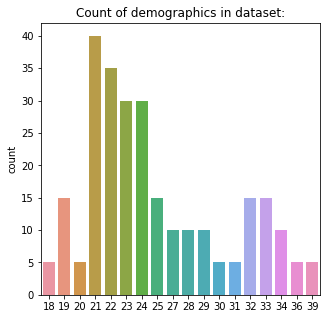

In [49]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df.Age.values, data=df)
ax.set_title("Count of demographics in dataset:")

In [50]:
#Checking for null values to fill
null_sum=df.isnull().sum()
null_sum
data_shape=df.shape
data_shape
#df.dropna()
#df.describe

(265, 4)

In [51]:
#Outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
#print(df['Age'].quantile(0.5))
print(
    (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))
)
#df['Age'].describe()

       Age  Gender  Genre   Mood
0    False   False  False  False
1    False   False  False  False
2    False   False  False  False
3    False   False  False  False
4    False   False  False  False
..     ...     ...    ...    ...
260  False   False  False  False
261  False   False  False  False
262  False   False  False  False
263  False   False  False  False
264  False   False  False  False

[265 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_15308\1504799766.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))


In [52]:
#Feature-scaling
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)
